## Likelihood(MLE와 MAP)

### 머신러닝의 목표

* 파라미터에 의해 결정되는 머신러닝 모델
* 모델이 표현하는 확률 분포를 데이터의 실제 분포에 가깝게 만드는 최적의 파라미터 값을 찾는 것

#### 목차

1. 들어가며: 머신러닝의 목표
2. 확률 변수로서의 모델 파라미터
3. posterior와 prior, likelihood 사이의 관계
4. likelihood와 머신러닝
5. likelihood 감 잡기
6. MLE: 최대 가능도 추론
7. MLE 최적해 구하기
8. MAP: 최대 사후 확률 추정
9. MLE와 MAP의 비교

### 확률 변수로서의 모델 파라미터

일차함수 모델 y = f(x) = ax + b 이라 할 때  
R<sup>2</sup> 공간안에 모든 점 (a,b)에 대해 하나의 일차함수 f에 대응되는 것

(a,b)가 위치하는 R<sup>2</sup> 공간을 파라미터 공간(parameter space)  
파라미터 공간에서 두 점 a,b를 뽑아 y = ax+b 그래프를 그리는 코드.  
이론상 실수 전체에서 샘플링해야하지만 시각화를 위해서 (-10, 10) 만 사용

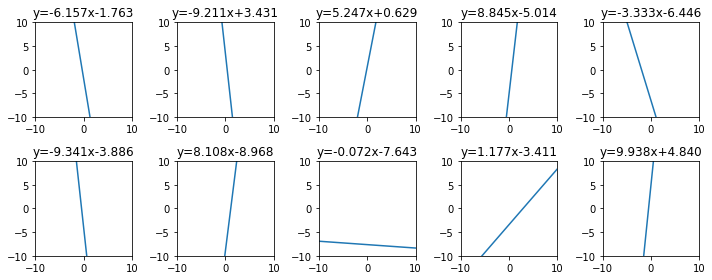

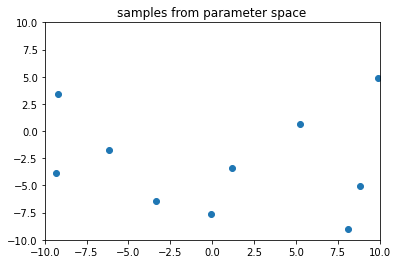

In [1]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

파라미터 공간에 주어진 확률 분포의 평균은 정규분포인 (1,0) 이므로  
이를 ax + b에 넣으면 y = x입니다. 즉 모델이 y=x에 가까울 확률이 크다는 것  
밑 코드는 평균이 (1,0)이고 표준편차가 0.5인 정규분포에서 10개의 점을 무작위로 뽑은 뒤, 대응되는 일차함수 그래프를 각각 그려주는 코드.  
그래프가 1.0에 몰려있습니다.

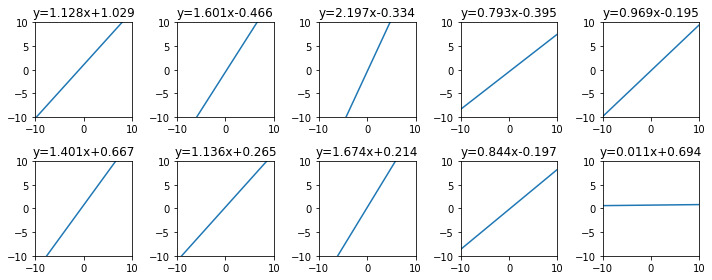

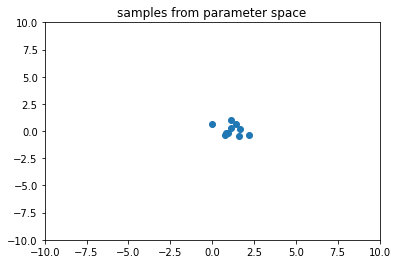

In [2]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

### posterior와 prior, likelihood 사이의 관계

#### 사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)

데이터 집합 X가 주어질 때, 데이터를 따르는 어떤 확률 분포 p(X)가 있다.  
우리 목표는 해당 p(X)를 가장 잘 나타내는 일차함수 모델 y = ax + b = θ⊤x 를 찾는 것.

* prior(prior probability, 사전 확률) : 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 p(θ)
  - 이전 예시에서 평균 (1,0) 표준편차 0.5인 정규분포
  - prior는 일반적인 정규분포가 될 수 있거나 데이터 특성에 따른 특정 확률 분포가 될 수 있다.

만약 prior 분포를 고정시킨다면 주어진 파라미터 분포에 대해 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있다. 이 값이 'likelihood'(가능도, 우도)이다.  
즉, 분포가 p(θ)가 정해졌을때 x라는 데이터가 관찰될 확률
* p(X = x∣θ) or L(θ∣x)

likelihood가 높다는 것은 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것 = 데이터의 분포를 모델이 잘 표현하는 것.
이 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 최대 가능도 추정(maximum likelihood estimation, MLE)이라 합니다.  

데이터 X가 주어졌을 때 파라미터 θ의 분포 p(θ∣X)를 생각해 볼 수 있습니다.  
이를 데이터를 관찰한 후 계산되는 확률 : posterior(사후 확률)라 부릅니다.  
사실 이게 우리가 필요한 것 입니다. 하지만 데이터의 개수는 유한하기 때문에 데이터가 따르는 확률 분포 p(X)는 정확히 알 수 없습니다.  
애초에 머신러닝 목표가 p(X)를 직접 구할 수 없으니 모델 파라미터 θ를 조절해가며 간접적으로 근사하는것.

그래서 posterior를 직접 계산 못하니까 prior랑 likelyhood에 관한 식으로 변형해서 그 식을 최대화하는 파라미터 θ를 찾는 것.  
이렇게 posterior를 최대화 하는 방향으로 모델을 학습시키는 것을 최대 사후 확률 추정(maximum a posteriori estimation, MAP)이라 합니다.

#### posterior와 prior, likelihood 사이의 관계

확률의 곱셉 정리로 인해 이렇게 표현가능하다.  
p(X , θ) = p(θ∣X) p(X) = p(X∣θ) p(θ)  
여기서 양변을 p(X)로 나누면  
p(θ∣X) = p(X∣θ) p(θ) / p(X)  
이는 posterior = likelihood * prior / p(X)(evidence) 로 표현되는데  
p(X)는 정확히 무엇인지 우리가 모르니 posterior를 구할 수 없다, 다만 p(X)는 데이터니 고정된 값이고(상수로 나눈다는 개념)  
likelihood와 prior는 계산이 가능하기 때문에 우변을 최대화하는 파라미터를 구할 수는 있다.(우변의 최대화 = posterior의 최대화)

### likelihood와 머신러닝

머신러닝은 항상 100%로 맞추는 모델로 만들기는 불가능하다. 그래서 예측값(prediction)과 실제값(label,target)이 오차가 생기는데  
이걸 우리는 데이터에 이미 노이즈가 섞여 있어서 그렇다고 해석합니다.

파라미터 분포 θ와 입력 데이터이 집합을 X, 라벨들의 집합을 Y 라고 할 때  
likelihood는 출력값의 확률 분포 p(Y | θ,X)가 됩니다. 

데이터 전체의 p(Y | θ,X) 말고 하나의 데이터만 보면 p(y<sub>n</sub>∣θ,x<sub>n</sub>) 인데,  
출력값의 분포를 어떻게 잡을 수 있을까?  
모델을 선형모델  y = θ⊤x 로 잡았을 때, 출력값의 분포는 모델의 예측값 θ⊤x에다가 노이즈의 분포를 더한 값  
노이즈의 분포를 평균이 0이고 표준편차가 σ인 정규분포로 가정한다면,  
출력 값의 분포는 평균이 θ⊤x<sub>n</sub> 이고 표준편차가 σ인 정규분포가 됩니다.  
![likelyhood](/home/aiffel/Code/AiffelPractice/Practice9/likelihood1.png)

### likelihood 감 잡기

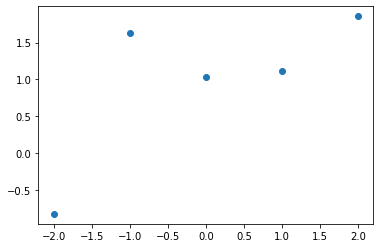

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

위는 좌표 평면에 5개의 랜덤한 점을 표시하는 코드입니다.  
아래 코드에서 일차 함수 식을 바꾸어가면서 데이터 포인트 5개의 likelihood 값이 어떻게 바뀌는지 살펴봅시다.  
예제는 계산을 위해 표준편차를 0.1로 두었습니다.

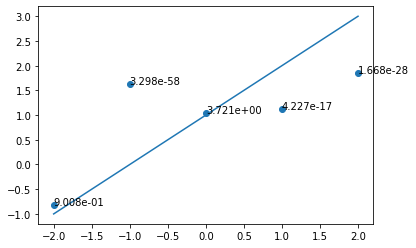

In [4]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

#### likelihood가 왜 중요한가?

위 그래프에서 보듯이 데이터 포인트가 모델 함수에서 멀어질수록 likely hood 값이 급격하게 감소합니다.  
이는 likelihood 를 구하는 식이 모델 예측값과 데이터의 라벨 차이를 제곱해서 exp의 지수에 넣었기 때문입니다.  
머신러닝의 목표는 데이터 포인트를 가장 잘 표현하는 모델을 찾는 것 = 데이터 포인트들의 likelihood 값을 크게하는 모델을 찾는 것 입니다.  
likelihood 최대값을 찾는 방법이 최대 가능도 추론(MLE)이죠? 다음은 MLE에 대해서 알아보겠습니다.

### MLE: 최대 가능도 추론

모델 파라미터 θ가 주어졌을 때, 데이터 포인트(x<sub>n</sub>,y<sub>n</sub>)의 likelihood는 다음과 같다.  
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood1.png" width="50%" height="50%"/>

데이터 포인트 (x<sub>1</sub>,y<sub>1</sub>),...,(x<sub>n</sub>,y<sub>n</sub>)가 서로 독립(independent)이고  
같은 확률 분포(identically distributed)를 따른다고 가정합니다.  
이 조건을 independent and identically distributed, 줄여서 i.i.d. 이라 부르고 머신러닝에서 중요한 전제조건입니다.  
위 조건에 의해 전체 데이터셋의 likelihood p(Y|θ,X)는 각각의 데이터 포인트의 likelihood를 모두 곱한 값과 같습니다.  
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood2.png" width="30%" height="30%"/> 

실제 MLE를 적용할 때는 likelihood 대신에 log likelihood를 최대화 하는 파라미터를 구합니다.  
이는 원래는 곱셈인데 로그화해서 덧셈으로 하니 미분계산이 더 쉬워지기 때문입니다.  
또한 로그 함수는 단조 증가하므로 likelihood를 최대화하는 파라미터와 log likelihood를 최대화하는 파라미터 값이 같아서 학습결과에 영향을 주지 않습니다.  
(또한 주로 likelihood가 0에 가까운데 log를 씌우면 여러 문제를 예방할 수 있습니다.)

likelihood 계산식에 로그를 씌우면 이렇게 된다.  
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood3.png" width="50%" height="50%"/>  
여기서 likelihood를 최대화하는 θ<sub>ML</sub> 이라고 하면 θ와 관계없는 부분을 빼고 식을 정리하면  
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood4.png" width="50%" height="50%"/>  
손실 함수를 최소화하는 관점에서, log likelihood를 최대화하는 대신  
negative log likelihood (−logp(Y∣θ,X)) 를 최소화하는 식으로 표현하기도 합니다. 
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood5.png" width="50%" height="50%"/>  
해당 형태는 최소 제곱법과 같습니다.  
즉 최소제곱법은 선형모델에서 노이즈의 분포가 N(0,σ<sup>2</sup>)라 할때 negative log likelihood를 최소화하는 파라미터를 찾는 것과 같습니다.  
 



### MLE: MLE 최적해 구하기

MLE를 이용해 최적의 파라미터를 찾아보고 데이터셋의 likelihood도 계산해 보도록 하겠습니다.  
아래 코드는 y = x + 1 함수를 기준으로 랜덤한 노이즈를 섞어서 데이터 포인트 20개를 생성하고 시각화하는 코드입니다.  
데이터 생성 단계에서 지정한 노이즈의 분포는 평균이 0이고 표준편차가 0.5인 정규분포입니다.

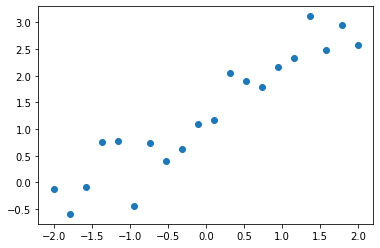

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

In [6]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


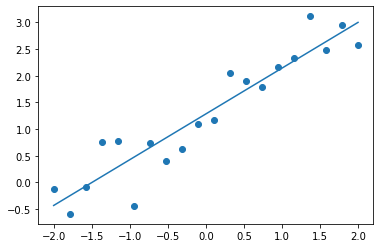

In [7]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

### MAP: 최대 사후 확률 추정

likelihoodd를 최대화하는 MLE 또는 최대 사후 확률 추정 (maximum a posteriori estimation, MAP)

LE의 최적 파라미터와 비교하면, 다른 점은 (σ<sup>2</sup>a<sup>2</sup>)I 항이 더해졌다는 것입니다.  
과연 두개는 무슨 차이일까요?

−logp(θ) = (1/2a<sup>2</sup>)||θ||<sup>2</sup> + constant  
−logp(θ) = λ||θ||<sup>2</sup> + constant  
최소제곱법의 정규화 항과 같은 형태.(L2 정규화)

### MLE와 MAP의 비교


#### 데이터셋 생성

MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior 부분이 존재한다는 차이가 있었습니다.  
그래서 MLE 모델보다 MAP 모델이 더 안정적이다.  
outlier(이상치)가 있는 데이터셋을 이용해 MAP와 MLE를 비교해 보도록 하겠습니다.  
y = x + 1에 랜덤한 노이즈를 더한 데이터 포인트입니다.

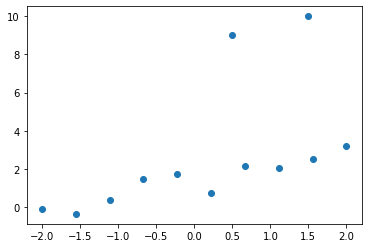

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

2개의 이상치가 보입니다.

#### 파라미터 계산

MLE와 MAP의 최적 파라미터  
<img src="/home/aiffel/Code/AiffelPractice/Practice9/likelihood7.png" width="40%" height="40%"/>  
노이즈 분포의 표준편차는 0.1, 파라미터 분포의 표준편차는 0.04로 지정.

In [9]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


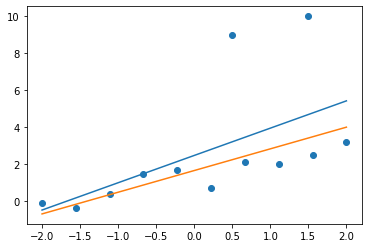

In [10]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()